In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display(Image):
    fig = plt.figure(figsize=(10,12))
    ax = plt.subplot(111)
    ax.imshow(Image, cmap='gray')
    

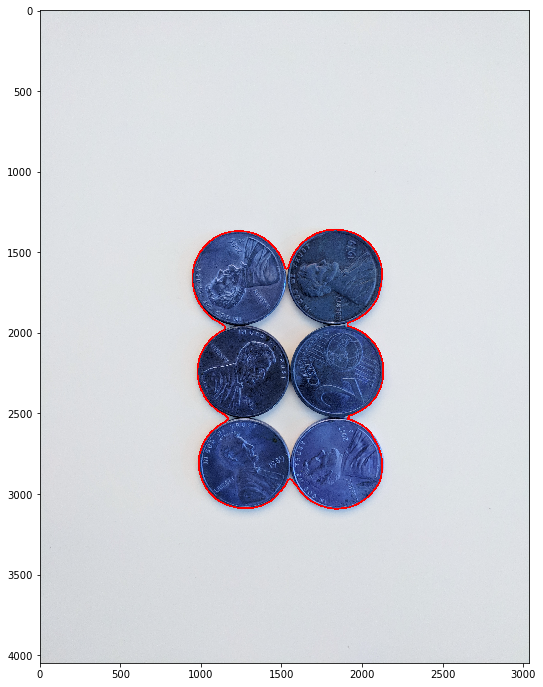

In [4]:
image = cv2.imread('pennies.jpg')
median_image_blur = cv2.medianBlur(image,35)
gray_image = cv2.cvtColor(median_image_blur, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_image, 160, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(image, contours, i, 255, 10)

display(image)

In [5]:
image = cv2.imread('pennies.jpg')
median_image_blur = cv2.medianBlur(image,35)
gray_image = cv2.cvtColor(median_image_blur, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_image, 160, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [6]:
kernel = np.ones((3,3), dtype=np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

In [7]:
sure_bg = cv2.dilate(opening, kernel, iterations=2)

In [15]:
dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 5)

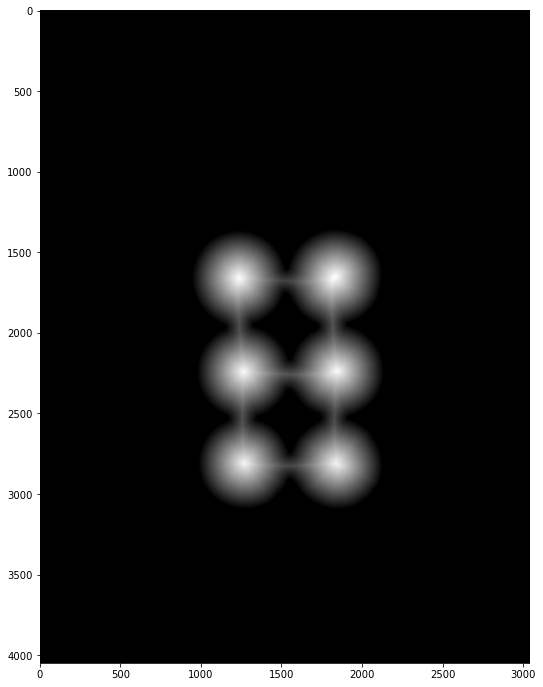

In [16]:
display(dist_transform)

In [20]:
ret, sure_fg = cv2.threshold(dist_transform, 0.75 * dist_transform.max(), 255, 0)

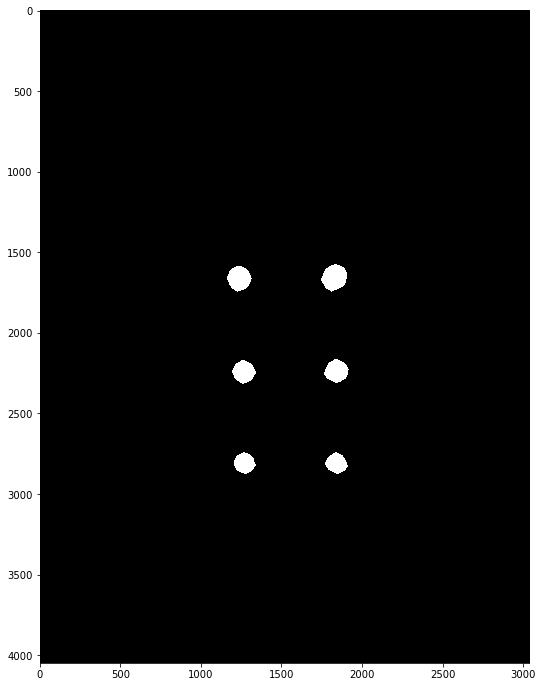

In [21]:
display(sure_fg)

In [23]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

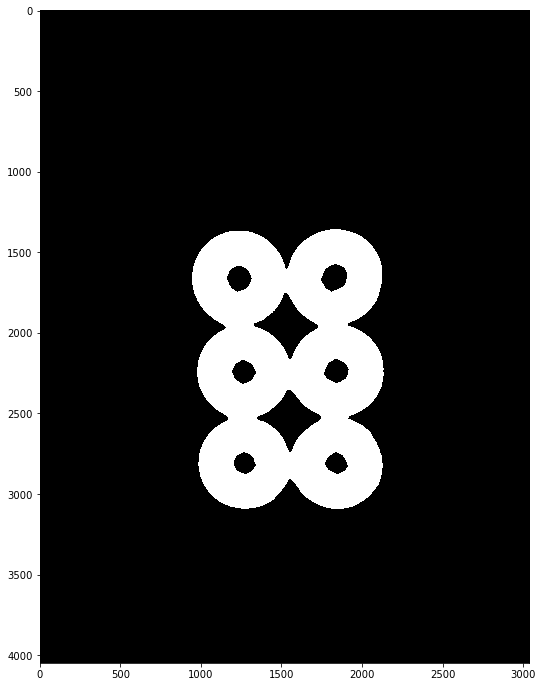

In [24]:
display(unknown)

In [25]:
ret, markers = cv2.connectedComponents(sure_fg)

In [27]:
markers = markers + 1

In [29]:
markers[unknown == 255] = 0

In [33]:
markers = cv2.watershed(image,markers)

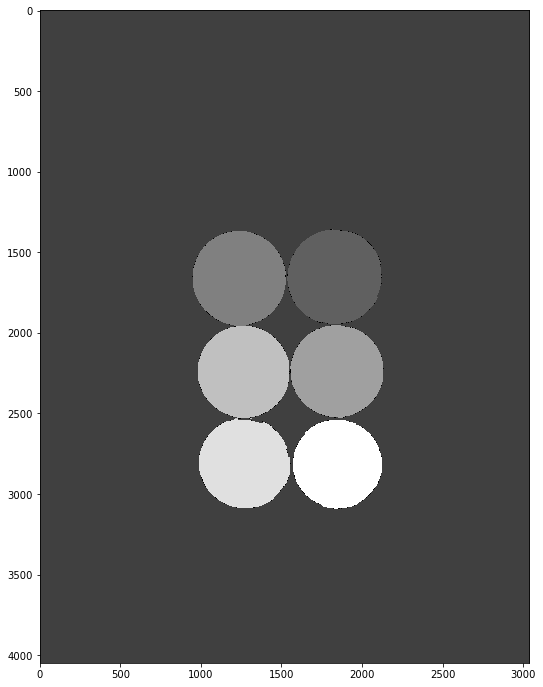

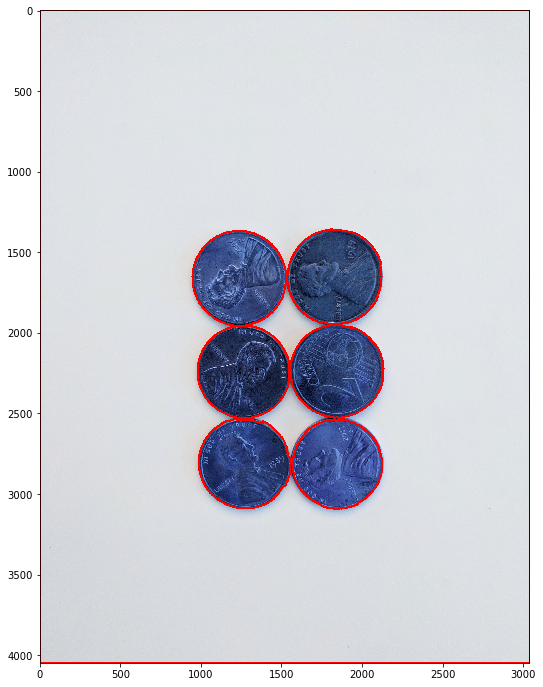

In [40]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(image, contours, i, 255, 10)

display(image)